### 本project任务
+ 使用三种初始化观察效果：全0，随机数初始化，梯度异常初始化
+ 使用两种正则化方法解决过拟合问题：L2正则化、随机丢弃
+ 梯度检验

### 引入库文件

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils
import reg_utils
import scipy.io as sio
import gc_utils

plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


D:\Code\JupyterNotebook\DeepLearningCourse\Course2_Week1\reg_utils.py:61: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
D:\Code\JupyterNotebook\DeepLearningCourse\Course2_Week1\reg_utils.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


### 模型

In [2]:
def model(X,Y,learning_rate=0.01,num_iterations=15000,print_cost=True,init="he",is_plot=True):
    grads={}
    costs=[]
    m = X.shape[1]
    layer_dims = [X.shape[0],10,5,1]
    if init == "zeros":
        params = init_params_zeros(layer_dims)
    elif init == "random":
        params = init_params_random(layer_dims)
    elif init == "he":
        params = init_params_he(layer_dims)
    else:
        print("Wrong init option!")
        exit
    
    for i in range(0,num_iterations):
        a3,cache = init_utils.forward_propagation(X,params)
        cost = init_utils.compute_loss(a3,Y)
        grads = init_utils.backward_propagation(X,Y,cache)
        params = init_utils.update_parameters(params,grads,learning_rate)
        
        if i%1000 == 0:
            costs.append(cost)
            if print_cost:
                print("Iteration "+ str(i)+" Cost:"+str(cost))
    if is_plot:
        plt.plot(costs)
        plt.ylabel("cost")
        plt.xlabel("#iterations")
        plt.title("Learning rate = "+str(learning_rate))
        plt.show()
    return params

### 初始化参数
首先读取训练数据并通过plt观察分布

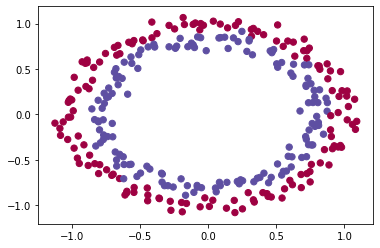

In [3]:
train_X,train_Y,test_X,test_Y = init_utils.load_dataset(is_plot=True)

#### 全零初始化

In [4]:
def init_params_zeros(layer_dims):
    L = len(layer_dims)
    params={}
    for i in range(1,L):
        params["W"+str(i)] = np.zeros((layer_dims[i],layer_dims[i-1]))
        params["b"+str(i)] = np.zeros((layer_dims[i],1))
    return params

测试：

In [5]:
params = init_params_zeros([3,2,1])
print("W1 = "+str(params["W1"]))
print("b1 = "+str(params["b1"]))
print("W2 = "+str(params["W2"]))
print("b2 = "+str(params["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


使用全零初始化方式训练模型

Iteration 0 Cost:0.6931471805599453
Iteration 1000 Cost:0.6931471805599453
Iteration 2000 Cost:0.6931471805599453
Iteration 3000 Cost:0.6931471805599453
Iteration 4000 Cost:0.6931471805599453
Iteration 5000 Cost:0.6931471805599453
Iteration 6000 Cost:0.6931471805599453
Iteration 7000 Cost:0.6931471805599453
Iteration 8000 Cost:0.6931471805599453
Iteration 9000 Cost:0.6931471805599453
Iteration 10000 Cost:0.6931471805599455
Iteration 11000 Cost:0.6931471805599453
Iteration 12000 Cost:0.6931471805599453
Iteration 13000 Cost:0.6931471805599453
Iteration 14000 Cost:0.6931471805599453


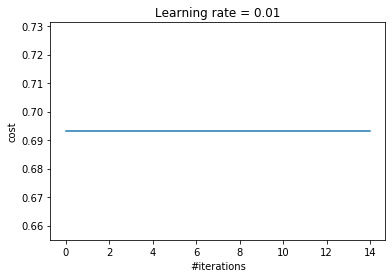

In [6]:
params = model(train_X,train_Y,init="zeros",is_plot=True)

计算训练集和测试集准确率

In [7]:
print ("Train set:")
predictions_train = init_utils.predict(train_X, train_Y, params)
print ("Test Set:")
predictions_test = init_utils.predict(test_X, test_Y, params)


Train set:
Accuracy: 0.5
Test Set:
Accuracy: 0.5


观察预测值：

predictions_train: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
prediction_test: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


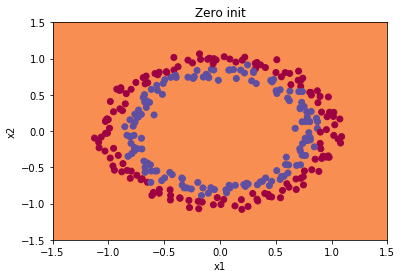

In [8]:
print("predictions_train: "+str(predictions_train))
print("prediction_test: "+str(predictions_test))

# Plot Decision Boundary
plt.title("Zero init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x : init_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))

可以看到全部的预测值为0，没有达到分类的要求。

#### 随机初始化

In [9]:
def init_params_random(layer_dims):
    params = {}
    np.random.seed(3)
    layer_num = len(layer_dims)
    for i in range(1,layer_num):
        params["W"+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])*10
        params["b"+str(i)] = np.zeros((layer_dims[i],1))
    return params

测试：

In [10]:
params = init_params_random([3,2,1])
print("W1 = "+str(params["W1"]))
print("b1 = "+str(params["b1"]))
print("W2 = "+str(params["W2"]))
print("b2 = "+str(params["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


训练模型

D:\Code\JupyterNotebook\DeepLearningCourse\Course2_Week1\init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\Code\JupyterNotebook\DeepLearningCourse\Course2_Week1\init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Iteration 0 Cost:inf
Iteration 1000 Cost:0.6250982793959966
Iteration 2000 Cost:0.5981216596703697
Iteration 3000 Cost:0.5638417572298645
Iteration 4000 Cost:0.5501703049199763
Iteration 5000 Cost:0.5444632909664456
Iteration 6000 Cost:0.5374513807000807
Iteration 7000 Cost:0.4764042074074983
Iteration 8000 Cost:0.39781492295092263
Iteration 9000 Cost:0.3934764028765484
Iteration 10000 Cost:0.3920295461882659
Iteration 11000 Cost:0.38924598135108
Iteration 12000 Cost:0.3861547485712325
Iteration 13000 Cost:0.384984728909703
Iteration 14000 Cost:0.3827828308349524


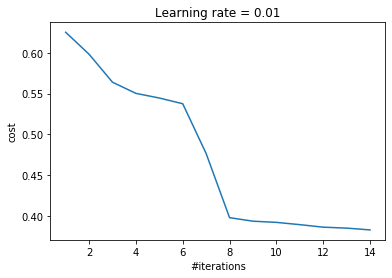

Train set：
Accuracy: 0.83
Test set：
Accuracy: 0.86
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


In [11]:
params = model(train_X, train_Y, init = "random",is_plot=True)
print("Train set：")
predictions_train = init_utils.predict(train_X, train_Y, params)
print("Test set：")
predictions_test = init_utils.predict(test_X, test_Y, params)

print(predictions_train)
print(predictions_test)


绘制决策边界：

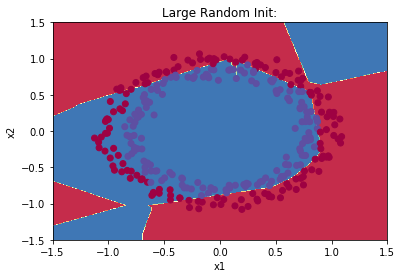

In [12]:
plt.title("Large Random Init:")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x:init_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))

####  防止梯度异常的初始化

In [15]:
def init_params_he(layer_dims):
    np.random.seed(3)
    layer_num = len(layer_dims)
    params={}
    for i in range(1,layer_num):
        params["W"+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*np.sqrt(2/layer_dims[i-1])
        params["b"+str(i)]=np.zeros((layer_dims[i],1))
    return params        


测试：

In [16]:
params = init_params_he([2,4,1])
print("W1 = "+str(params["W1"]))
print("b1 = "+str(params["b1"]))
print("W2 = "+str(params["W2"]))
print("b2 = "+str(params["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


利用该初始化方法训练模型

Iteration 0 Cost:0.8830537463419761
Iteration 1000 Cost:0.6879825919728063
Iteration 2000 Cost:0.6751286264523371
Iteration 3000 Cost:0.6526117768893807
Iteration 4000 Cost:0.6082958970572937
Iteration 5000 Cost:0.5304944491717495
Iteration 6000 Cost:0.4138645817071793
Iteration 7000 Cost:0.3117803464844441
Iteration 8000 Cost:0.23696215330322556
Iteration 9000 Cost:0.18597287209206828
Iteration 10000 Cost:0.15015556280371808
Iteration 11000 Cost:0.12325079292273548
Iteration 12000 Cost:0.09917746546525937
Iteration 13000 Cost:0.08457055954024274
Iteration 14000 Cost:0.07357895962677366


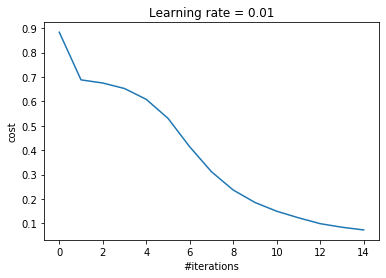

Train set:
Accuracy: 0.9933333333333333
Test set:
Accuracy: 0.96


In [17]:
params = model(train_X,train_Y,init="he",is_plot=True)
print("Train set:")
predictions_train = init_utils.predict(train_X,train_Y,params)
print("Test set:")
predictions_test = init_utils.predict(test_X,test_Y,params)

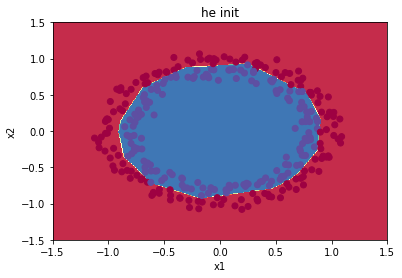

In [19]:
plt.title("he init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x:init_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))

### 正则化

加载数据集：

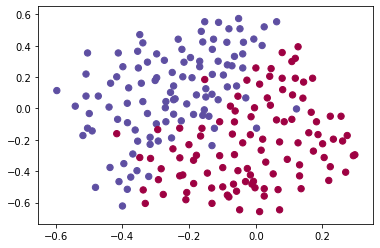

In [4]:
def load_2D_dataset(is_plot=True):
    data = sio.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T
    if is_plot:
        plt.scatter(train_X[0, :], train_X[1, :], c=np.squeeze(train_Y), s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

train_X,train_Y,test_X,test_Y = load_2D_dataset(is_plot=True)

#### 含有正则化（regularization）的模型训练函数

In [6]:
def model(X,Y,learning_rate=0.3,num_iterations=30000,print_cost=True,is_plot=True,lambd=0,keep_prob=1):
    grads = {}
    costs = []
    #params = {}
    m = X.shape[0]
    layer_dims = [X.shape[0],20,3,1]
    # initialize parameters
    params = reg_utils.initialize_parameters(layer_dims)
    
    # Training
    for i in range(num_iterations):
        # Forward Prop
        if keep_prob==1:
            a3,cache = reg_utils.forward_propagation(X,params)
        elif keep_prob<1:
            a3,cache = forward_propagation_with_dropout(X,params,keep_prob)
        else:
            print("Wrong keep_prob value. Try again.")
            exit
        
        # Compute cost
        if lambd==0:
            cost = reg_utils.compute_cost(a3,Y)
        else:
            cost = compute_cost_with_regularization(a3,Y,params,lambd)
            
        # Back prop
        if (lambd==0 and keep_prob==1):
            grads = reg_utils.backward_propagation(X,Y,cache)
        elif lambd!=0:
            grads = backward_propagation_with_regularization(X,Y,cache,lambd)
        elif keep_prob<1:
            grads = backward_propagation_with_dropout(X,Y,cache,keep_prob)
            
        # update parameters
        params = reg_utils.update_parameters(params,grads,learning_rate)
        
        
        # print cost
        if (i%1000==0):
            costs.append(cost)
            if(print_cost and i%10000)==0:
                print("Iteration "+str(i)+": "+str(cost))
                
    # Plot cost curve
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('#iterations')
        plt.title('learning rate='+str(learning_rate))
        plt.show()
    
    return params
        

先不使用正则化对模型进行训练

Iteration 0: 0.6557412523481002
Iteration 10000: 0.16329987525724196
Iteration 20000: 0.13851642423253843


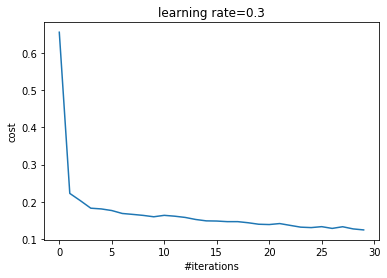

Train set:
Accuracy: 0.9478672985781991
Test set:
Accuracy: 0.915


In [7]:
params = model(train_X,train_Y,is_plot=True)
print("Train set:")
predictions_train = init_utils.predict(train_X,train_Y,params)
print("Test set:")
predictions_test = init_utils.predict(test_X,test_Y,params)

绘制不正则化模型的decision boundary

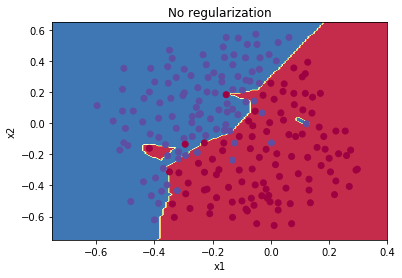

In [8]:
plt.title("No regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x:reg_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))


从decision boundary的线条以及训练集测试集的准确率来看，当前不使用正则化的模型出现过拟合的问题。

In [11]:
def compute_cost_with_regularization(A3,Y,params,lambd):
    m = Y.shape[1]
    W1 = params["W1"]
    W2 = params["W2"]
    W3 = params["W3"]
    orig_cost = reg_utils.compute_cost(A3,Y)
    cost = orig_cost + lambd/(2*m)*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))
    return cost

def backward_propagation_with_regularization(X,Y,cache,lambd):
    m = X.shape[1]
    
    (Z1,A1,W1,b1,Z2,A2,W2,b2,Z3,A3,W3,b3) = cache
    
    dZ3 = A3 - Y
    dW3 = np.dot(dZ3,A2.T)/m + lambd*W3/m
    db3 = np.sum(dZ3,axis=1,keepdims=True)/m
    
    dA2 = np.dot(W3.T,dZ3)
    dZ2 = np.multiply(dA2,np.int64(A2>0))
    dW2 = np.dot(dZ2,A1.T)/m + lambd*W2/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = np.multiply(dA1,np.int64(A1>0))
    dW1 = np.dot(dZ1,X.T)/m + lambd*W1/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    
    grads={
        "dZ3":dZ3,"dW3":dW3,"db3":db3,
        "dA2":dA2,"dZ2":dZ2,"dW2":dW2,"db2":db2,
        "dA1":dA1,"dZ1":dZ1,"dW1":dW1,"db1":db1
    }
    return grads

带有L2正则化的模型：

Iteration 0: 0.6974484493131264
Iteration 10000: 0.2684918873282239
Iteration 20000: 0.2680916337127301


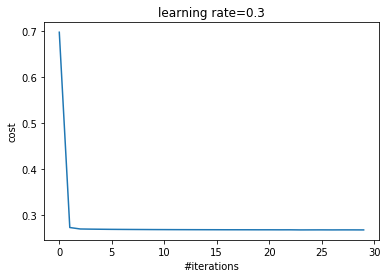

Train set:
Accuracy: 0.9383886255924171
Test set:
Accuracy: 0.93


In [12]:
params = model(train_X,train_Y,lambd=0.7,is_plot=True)
print("Train set:")
predictions_train = reg_utils.predict(train_X,train_Y,params)
print("Test set:")
predictions_train = reg_utils.predict(test_X,test_Y,params)

绘制decision boundary

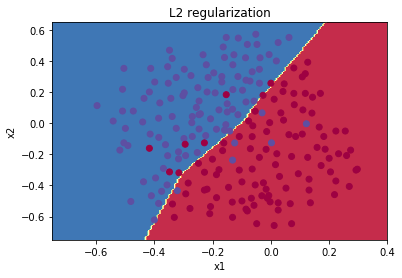

In [13]:
plt.title("L2 regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x:reg_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))


#### Dropout 正则化

In [25]:
def forward_propagation_with_dropout(X,params,keep_prob=0.5):
    np.random.seed(1)
    W1, b1 = params["W1"], params["b1"]
    W2, b2 = params["W2"], params["b2"]
    W3, b3 = params["W3"], params["b3"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = reg_utils.relu(Z1)
    
    # layer 1 drop out
    D1 = np.random.rand(A1.shape[0],A1.shape[1])<keep_prob
    A1 = np.multiply(A1,D1)
    A1 = A1 / keep_prob
    
    Z2 = np.dot(W2,A1)+b2
    A2 = reg_utils.relu(Z2)
    
    # layer 2 drop out
    D2 = np.random.rand(A2.shape[0],A2.shape[1])<keep_prob
    A2 = np.multiply(A2,D2)
    A2 = A2 / keep_prob
    
    # No dropout at final layer
    Z3 = np.dot(W3,A2)+b3
    A3 = reg_utils.sigmoid(Z3)
    
    cache = (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)
    
    return A3,cache

In [26]:
def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    m = X.shape[1]
    (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)=cache
    # No dropout at output layer
    dZ3 = A3 - Y
    dW3 = (1/m)*np.dot(dZ3,A2.T)
    db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)
    
    # layer 2 dropout
    dA2 = np.dot(W3.T,dZ3)
    dA2 = np.multiply(dA2,D2)
    dA2 = dA2 / keep_prob
    
    dZ2 = np.multiply(dA2,np.int64(A2>0))
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    
    # layer 1 dropout
    dA1 = np.dot(W2.T,dZ2)
    dA1 = np.multiply(dA1,D1)
    dA1 = dA1 / keep_prob
    
    dZ1 = np.multiply(dA1,np.int64(A1>0))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {
        "dZ3":dZ3,"dW3":dW3,"db3":db3,
        "dA2":dA2,"dZ2":dZ2,"dW2":dW2,"db2":db2,
        "dA1":dA1,"dZ1":dZ1,"dW1":dW1,"db1":db1
    }
    return grads

训练带有dropout正则化的模型

Iteration 0: 0.6543912405149825
Iteration 10000: 0.061016986574905605
Iteration 20000: 0.060582435798513114


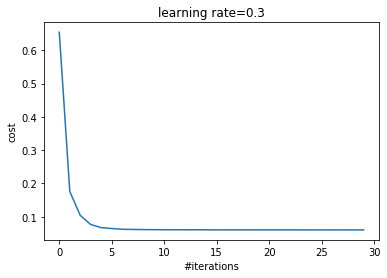

Train set:
Accuracy: 0.9289099526066351
Test set:
Accuracy: 0.95


In [28]:
params = model(train_X,train_Y,keep_prob=0.86,learning_rate=0.3,is_plot=True)
print("Train set:")
predictions_train = reg_utils.predict(train_X,train_Y,params)
print("Test set:")
predictions_test = reg_utils.predict(test_X,test_Y,params)

In [ ]:
n